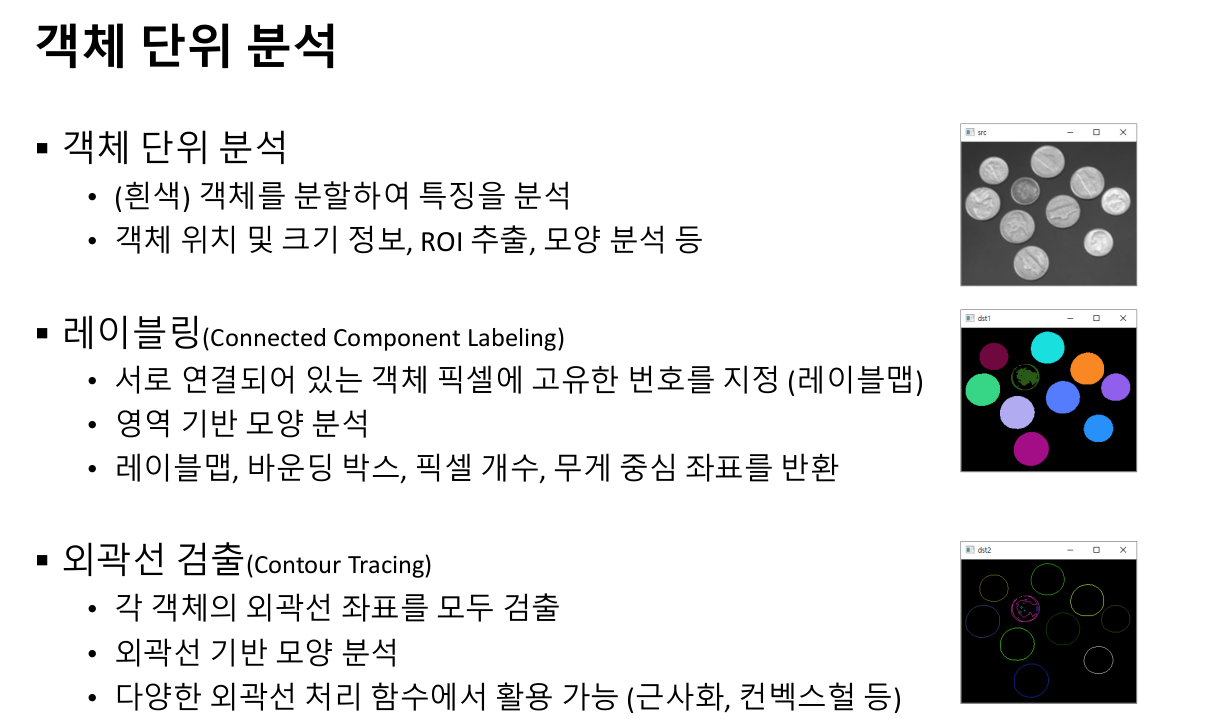

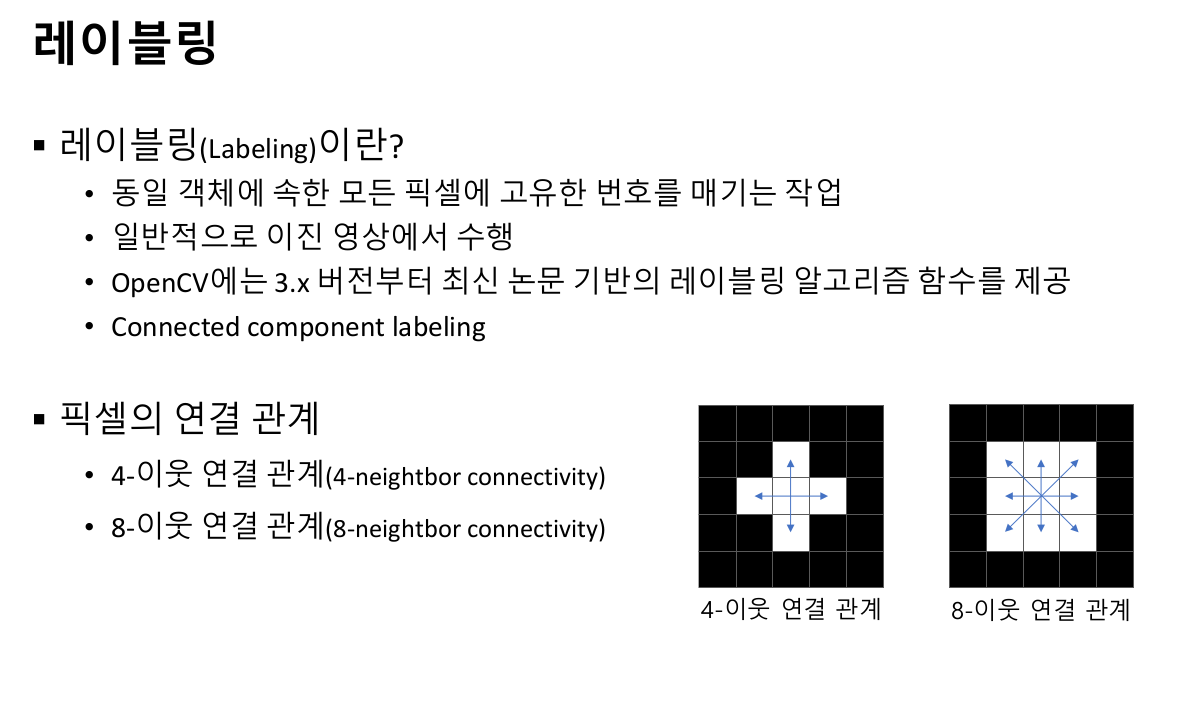

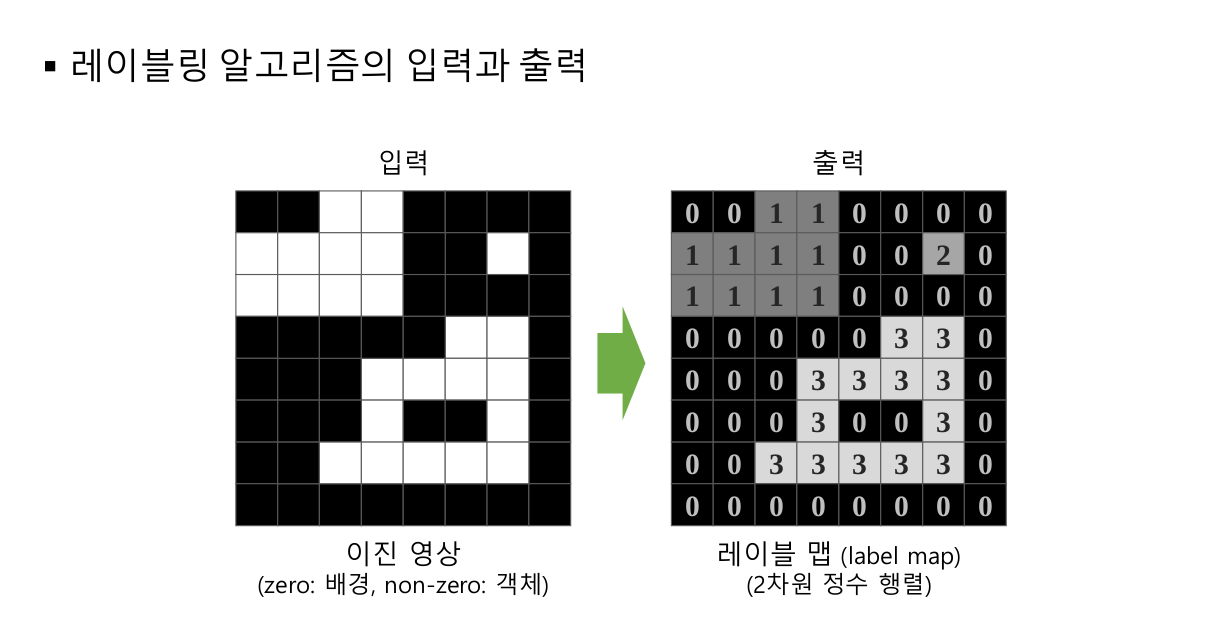

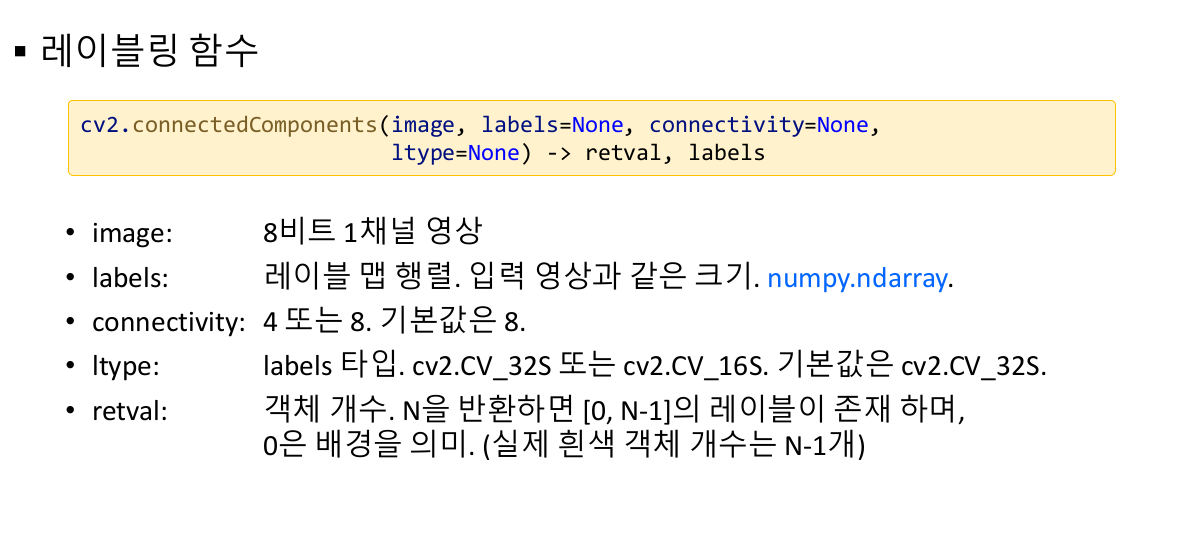

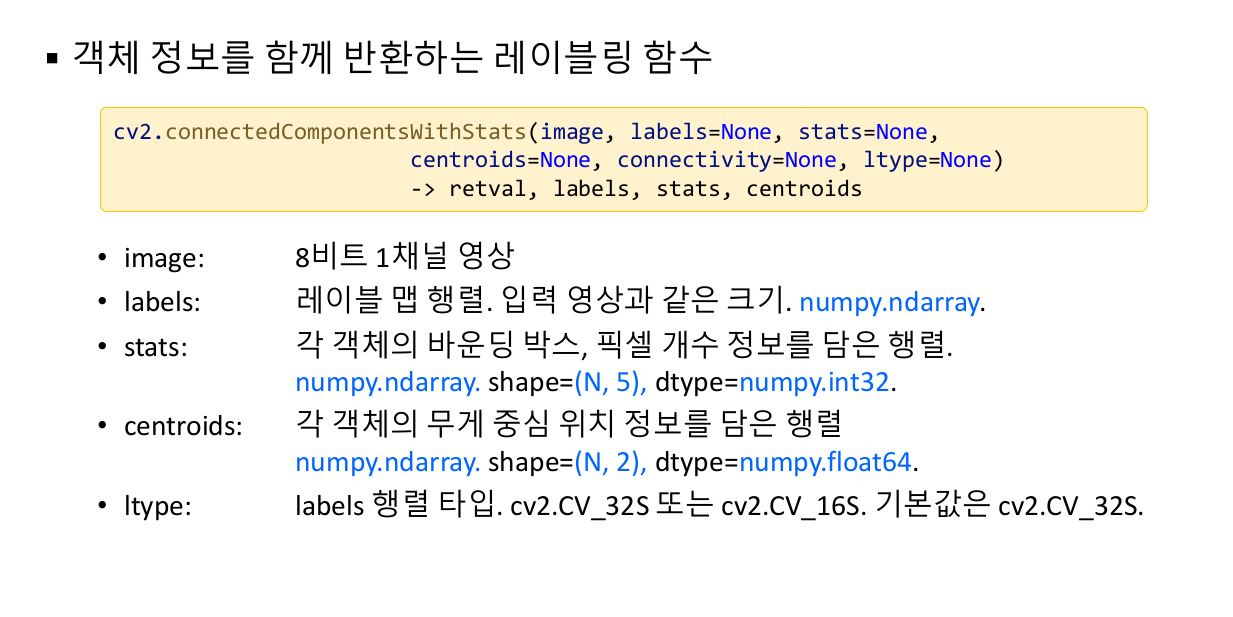

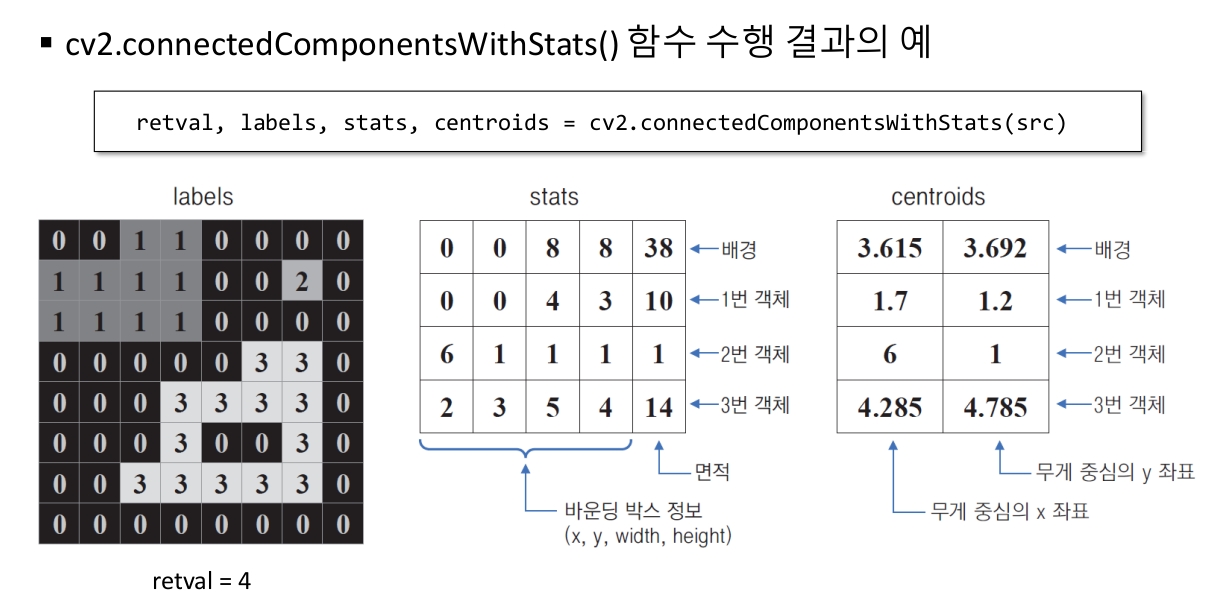

In [1]:
import sys
import numpy as np
import cv2


mat = np.array([
    [0, 0, 1, 1, 0, 0, 0, 0],
    [1, 1, 1, 1, 0, 0, 1, 0],
    [1, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 0],
    [0, 0, 1, 1, 0, 0, 1, 0],
    [0, 0, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0]], np.uint8)

cnt, labels = cv2.connectedComponents(mat)

print('sep:', mat, sep='\n')
print('cnt:', cnt)
print('labels:', labels, sep='\n')


sep:
[[0 0 1 1 0 0 0 0]
 [1 1 1 1 0 0 1 0]
 [1 1 1 1 0 0 0 0]
 [0 0 0 0 0 1 1 0]
 [0 0 0 1 1 1 1 0]
 [0 0 1 1 0 0 1 0]
 [0 0 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 0]]
cnt: 4
labels:
[[0 0 1 1 0 0 0 0]
 [1 1 1 1 0 0 2 0]
 [1 1 1 1 0 0 0 0]
 [0 0 0 0 0 3 3 0]
 [0 0 0 3 3 3 3 0]
 [0 0 3 3 0 0 3 0]
 [0 0 3 3 3 3 3 0]
 [0 0 0 0 0 0 0 0]]


In [4]:
retval, labels, stats, centroids = cv2.connectedComponentsWithStats(mat)
retval, labels, stats, centroids

(4,
 array([[0, 0, 1, 1, 0, 0, 0, 0],
        [1, 1, 1, 1, 0, 0, 2, 0],
        [1, 1, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 3, 3, 0],
        [0, 0, 0, 3, 3, 3, 3, 0],
        [0, 0, 3, 3, 0, 0, 3, 0],
        [0, 0, 3, 3, 3, 3, 3, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32),
 array([[ 0,  0,  8,  8, 39],
        [ 0,  0,  4,  3, 10],
        [ 6,  1,  1,  1,  1],
        [ 2,  3,  5,  4, 14]], dtype=int32),
 array([[3.61538462, 3.69230769],
        [1.7       , 1.2       ],
        [6.        , 1.        ],
        [4.28571429, 4.78571429]]))

In [5]:
import sys
import numpy as np
import cv2

In [7]:
src = cv2.imread('../data/keyboard.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

In [8]:
_, src_bin = cv2.threshold(src, 0 , 255, cv2.THRESH_OTSU)

In [9]:
cnt, labels, stats , centroids = cv2.connectedComponentsWithStats(src_bin)

In [10]:
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

In [11]:
for i in range(1,cnt):
    (x, y, w, h, area) = stats[i]
    
    if area < 20:
        continue
        
    cv2.rectangle(dst, (x, y, w, h), (0, 255, 255))

In [12]:
cv2.imshow('src', src)
cv2.imshow('src_bin', src_bin)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()